In [18]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

from config_alpha_experiment import *

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
ACTIVE_ALPHA_ANIMALS = ["R044", "R048", "R052", "R053", "R056"]
MIN_DATE, _ = utils.dj_utils.return_date_window(n_days_back=20)
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ACTIVE_ALPHA_ANIMALS, date_min=MIN_DATE
)

[2024-10-16 09:56:50,430][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id R044
no sessions found for R044 between 2024-09-26 and 2030-01-01
animal_id R048
Fetched 19 dates from Sessions table from 2024-09-26 to 2024-10-15 for R048

animal_id R052
Fetched 20 dates from Sessions table from 2024-09-26 to 2024-10-15 for R052

animal_id R053
no sessions found for R053 between 2024-09-26 and 2030-01-01
animal_id R056
Fetched 19 dates from Sessions table from 2024-09-26 to 2024-10-15 for R056



In [20]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ACTIVE_ALPHA_ANIMALS, date_min=MIN_DATE, verbose=True
)

Fetched data from SessionAggDate table from 2024-09-26 to 2024-10-15  
	Last date on the database is 2024-10-15 but user is querying data 
	for 2024-10-16. Attempting to manually aggregate today's data.
No new data from today, 2024-10-16 to add to SessionAggDate.

57 daily summaries fetched for animals: 
['R044', 'R048', 'R052', 'R053', 'R056']
between 2024-09-26 and 2024-10-15


## Plot over Days


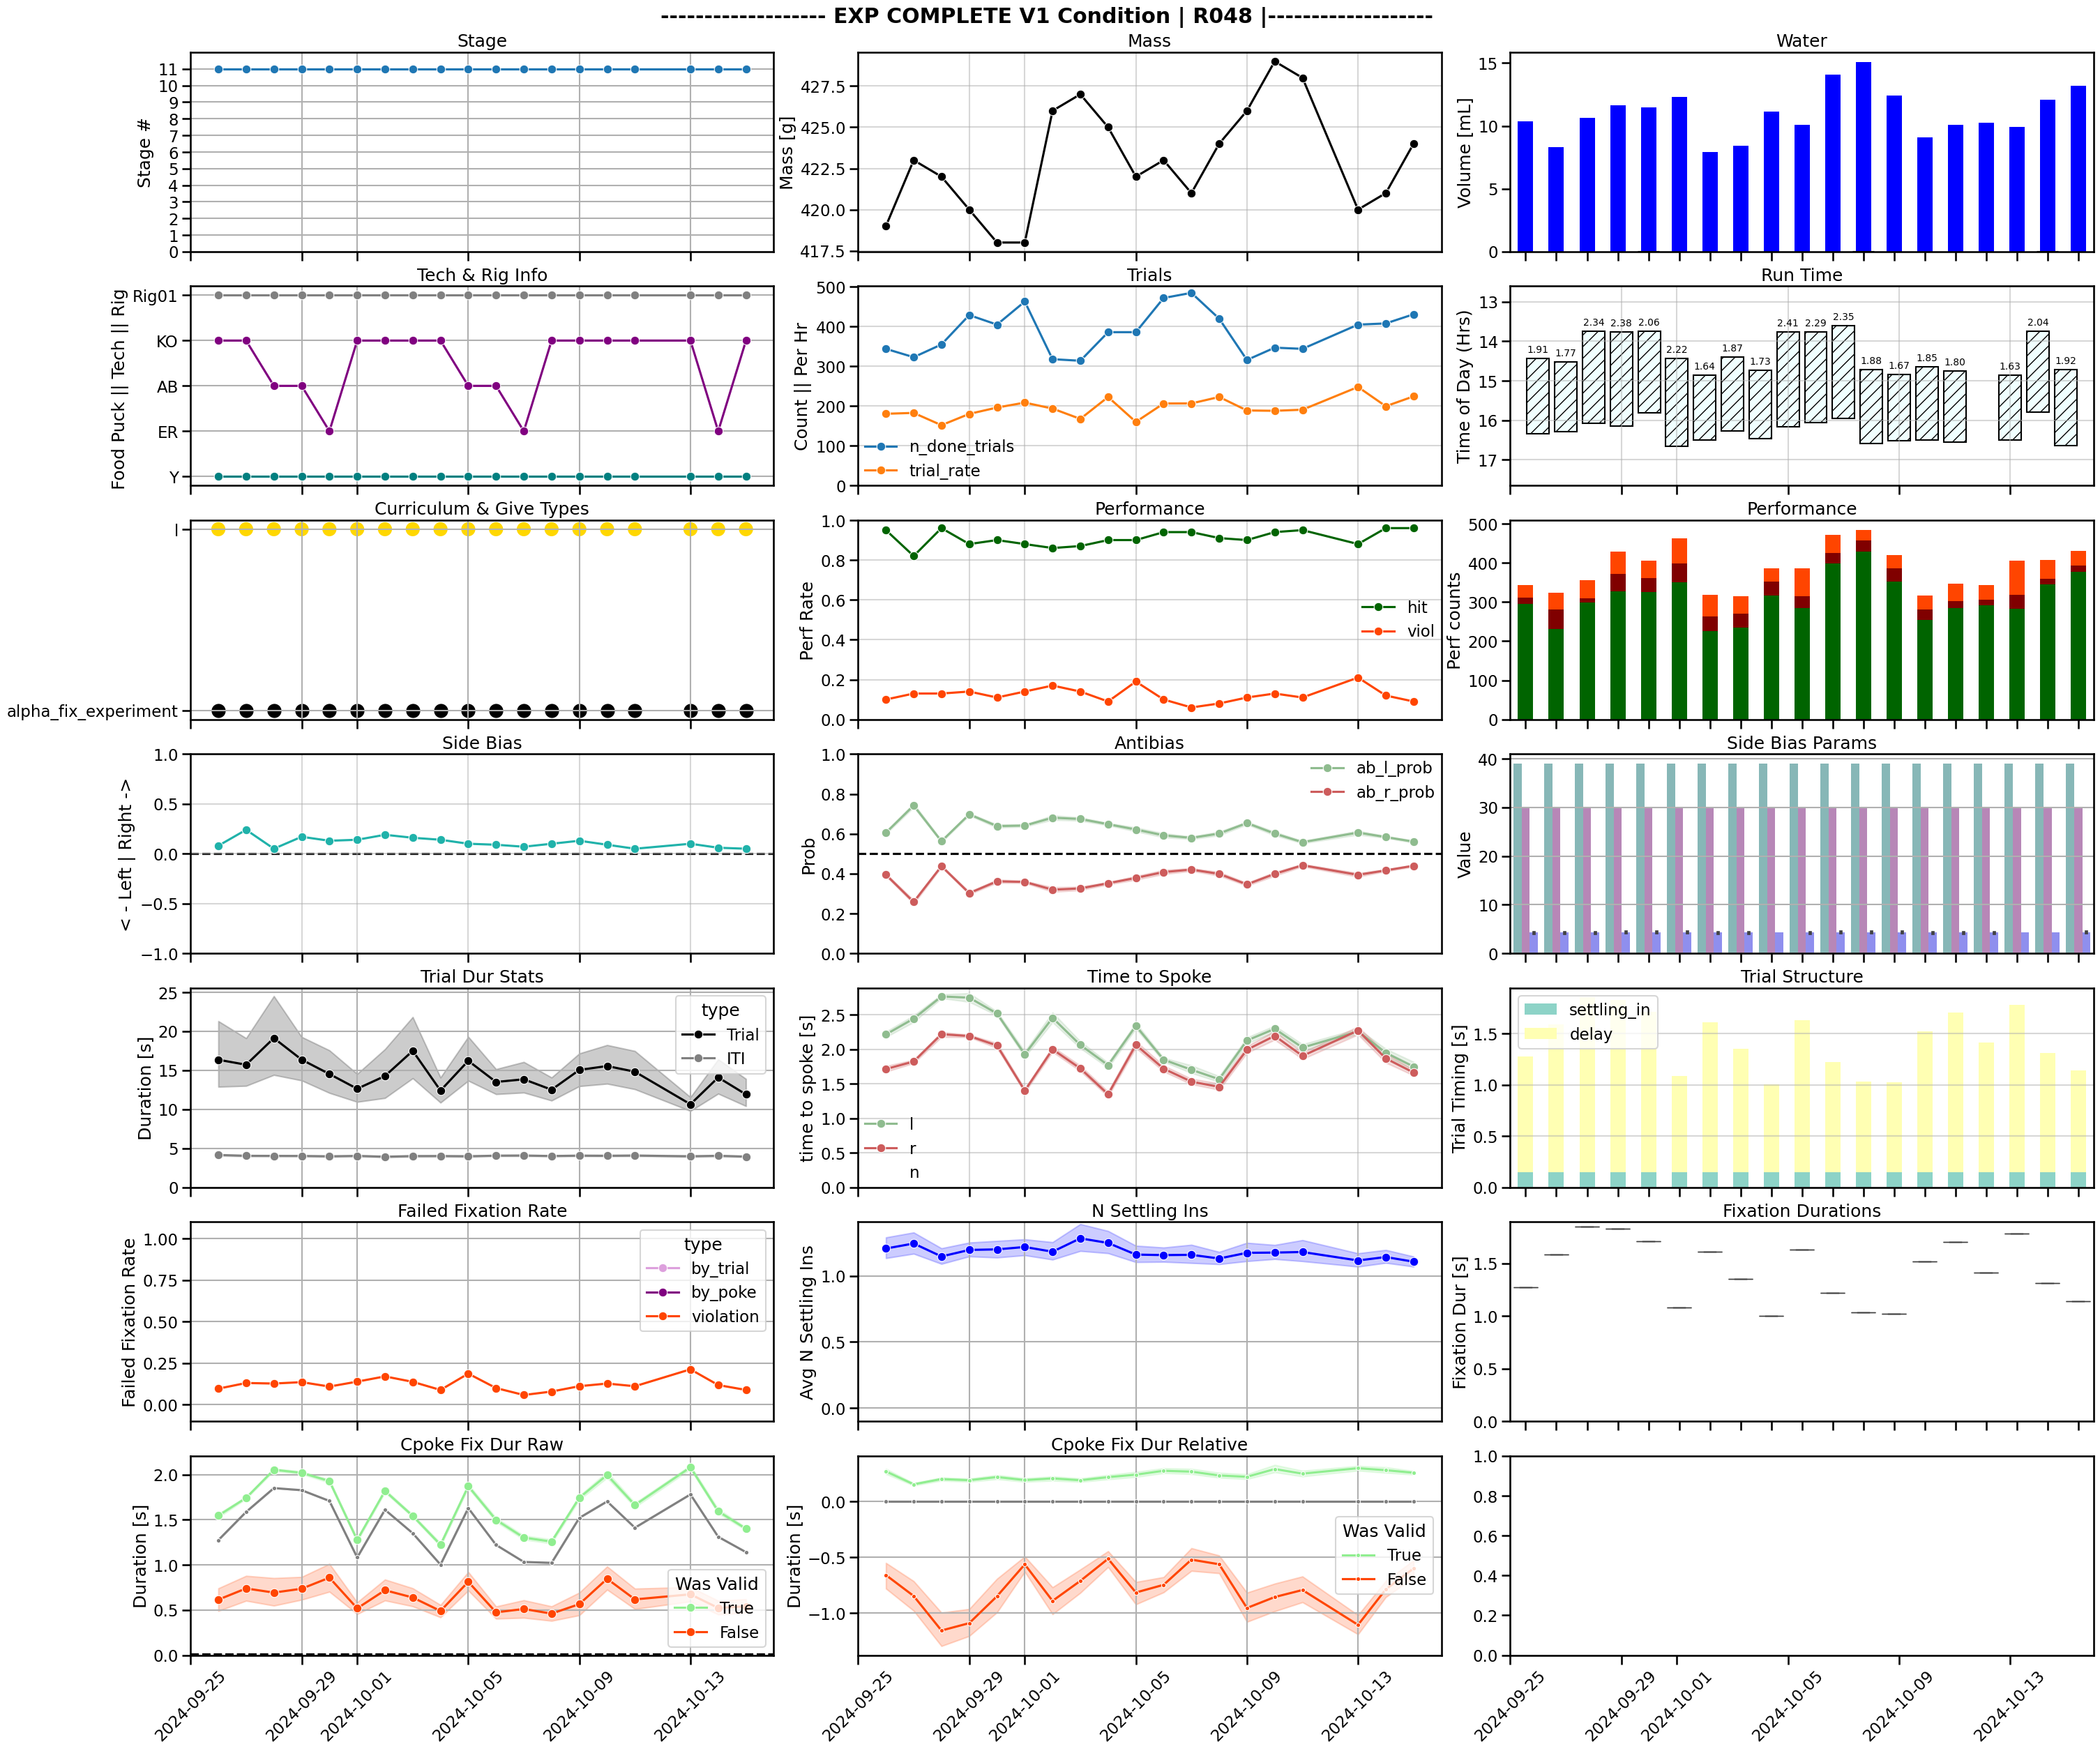

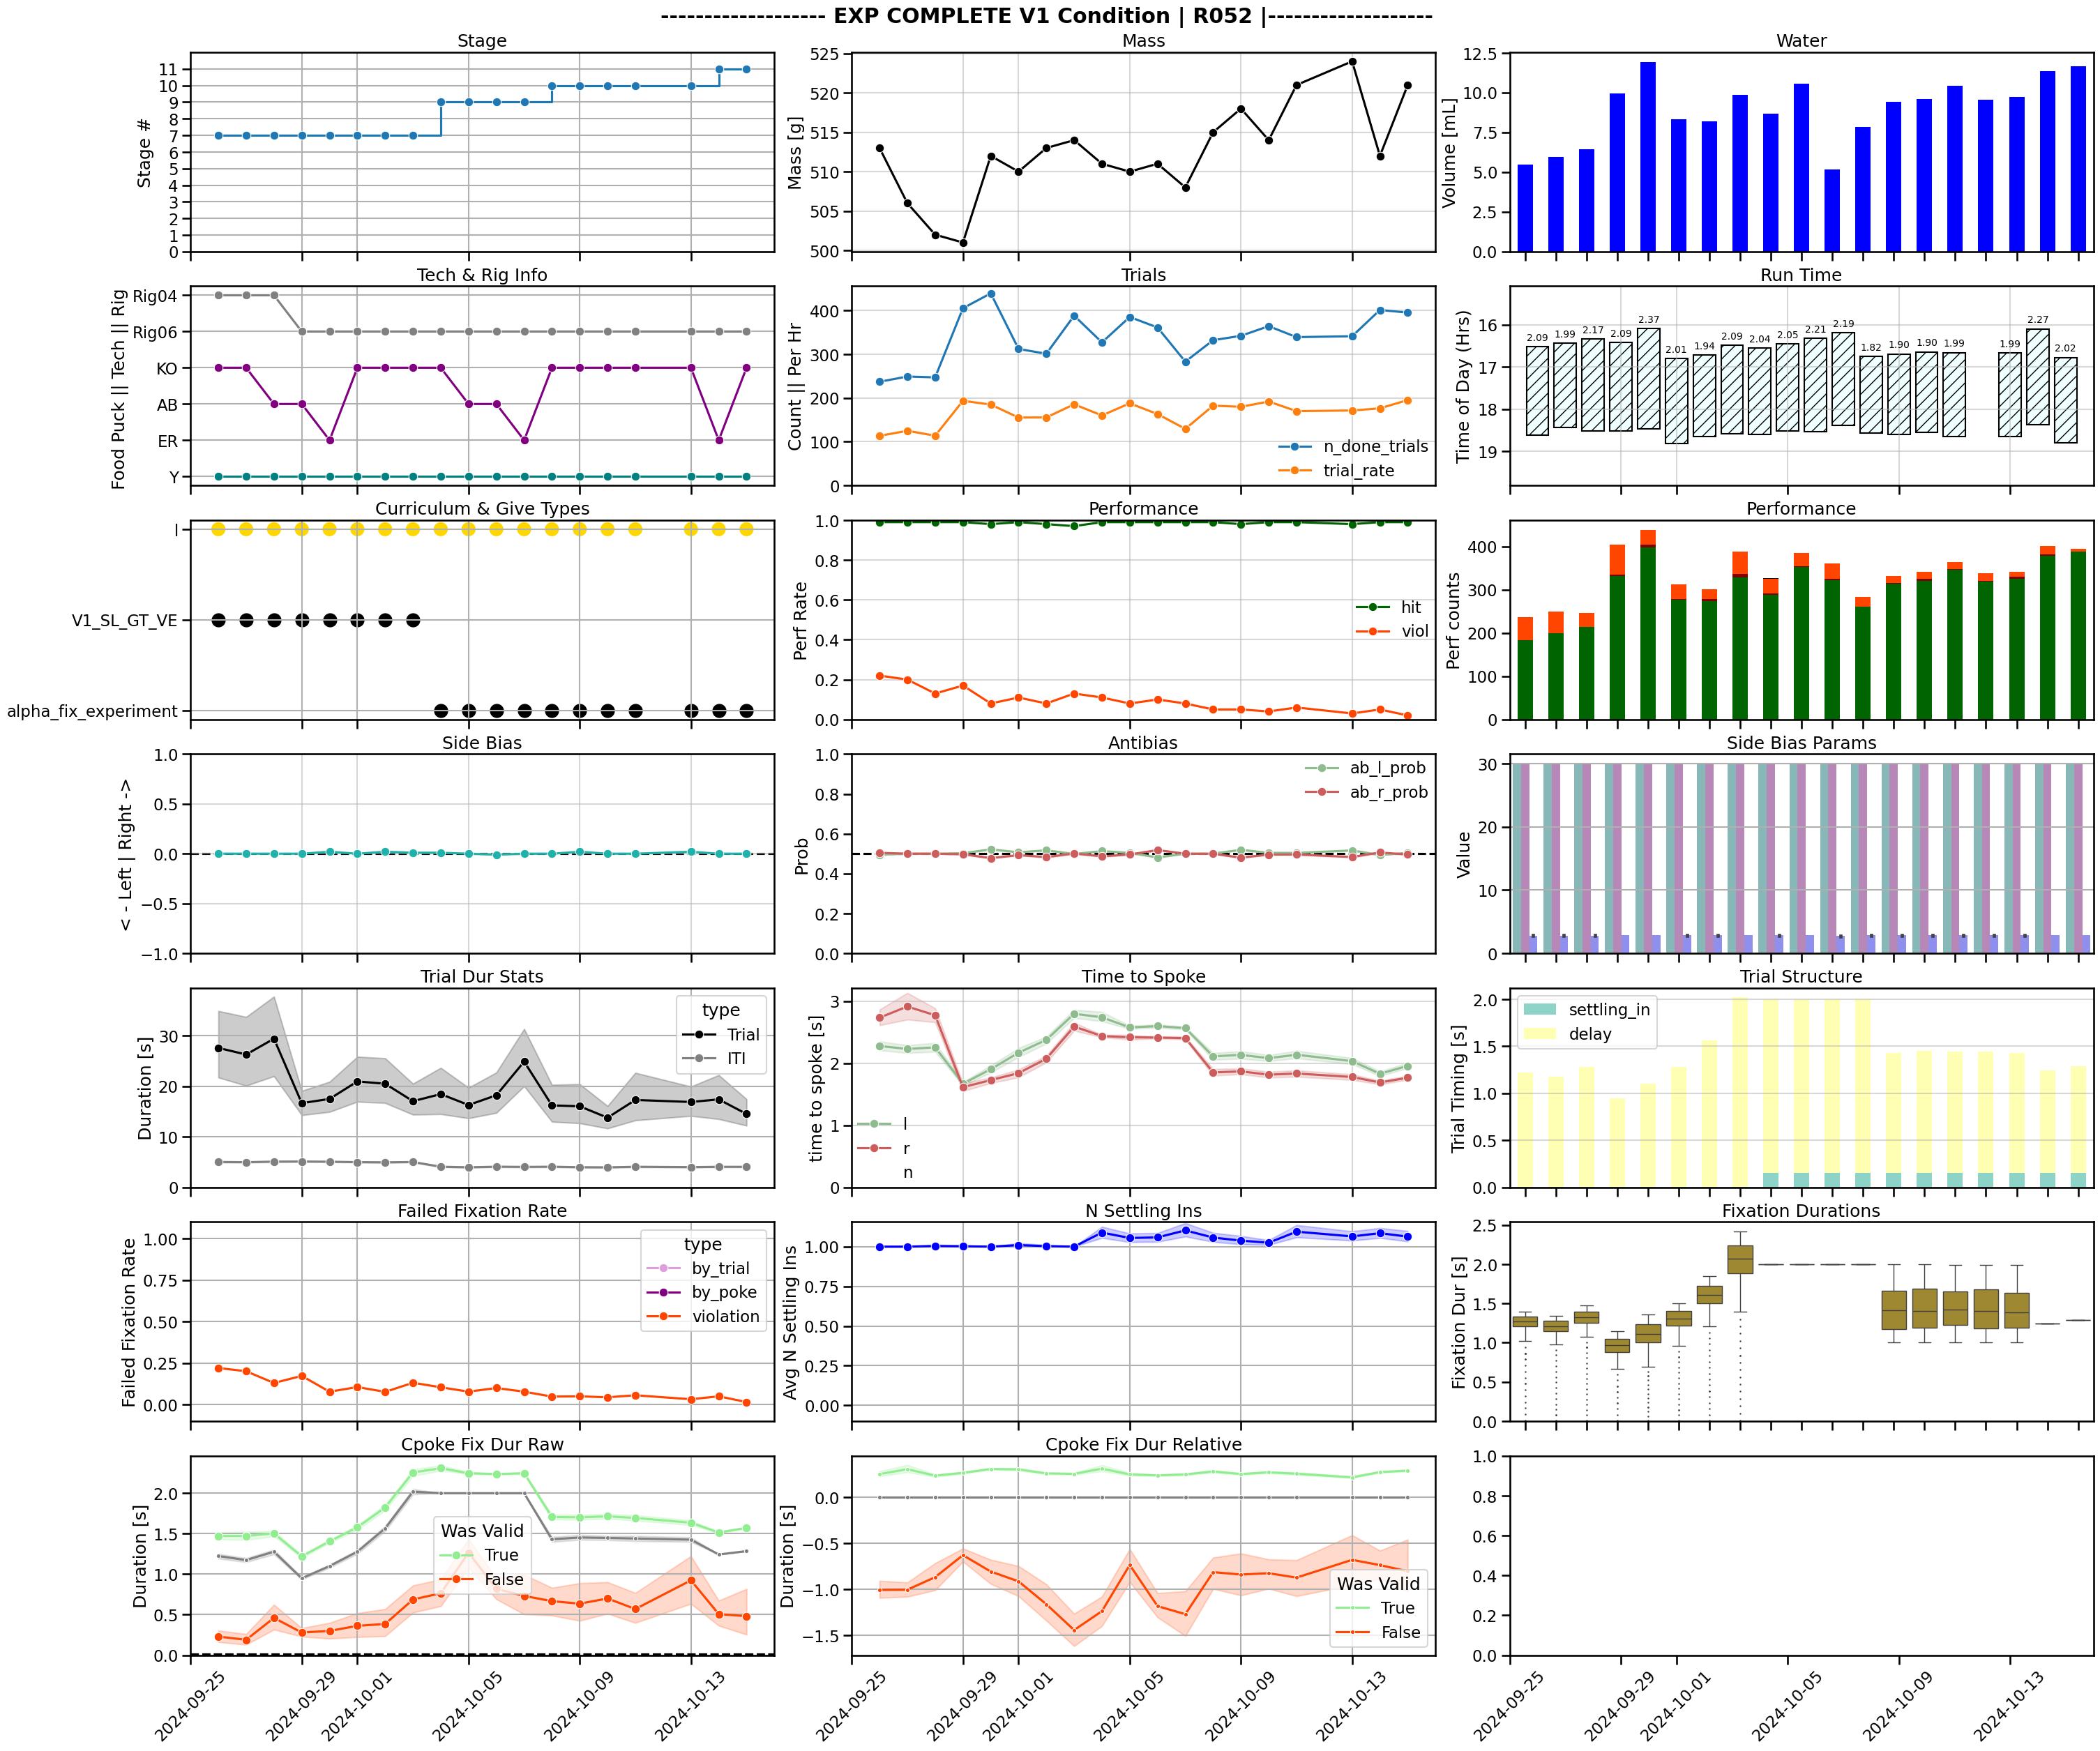

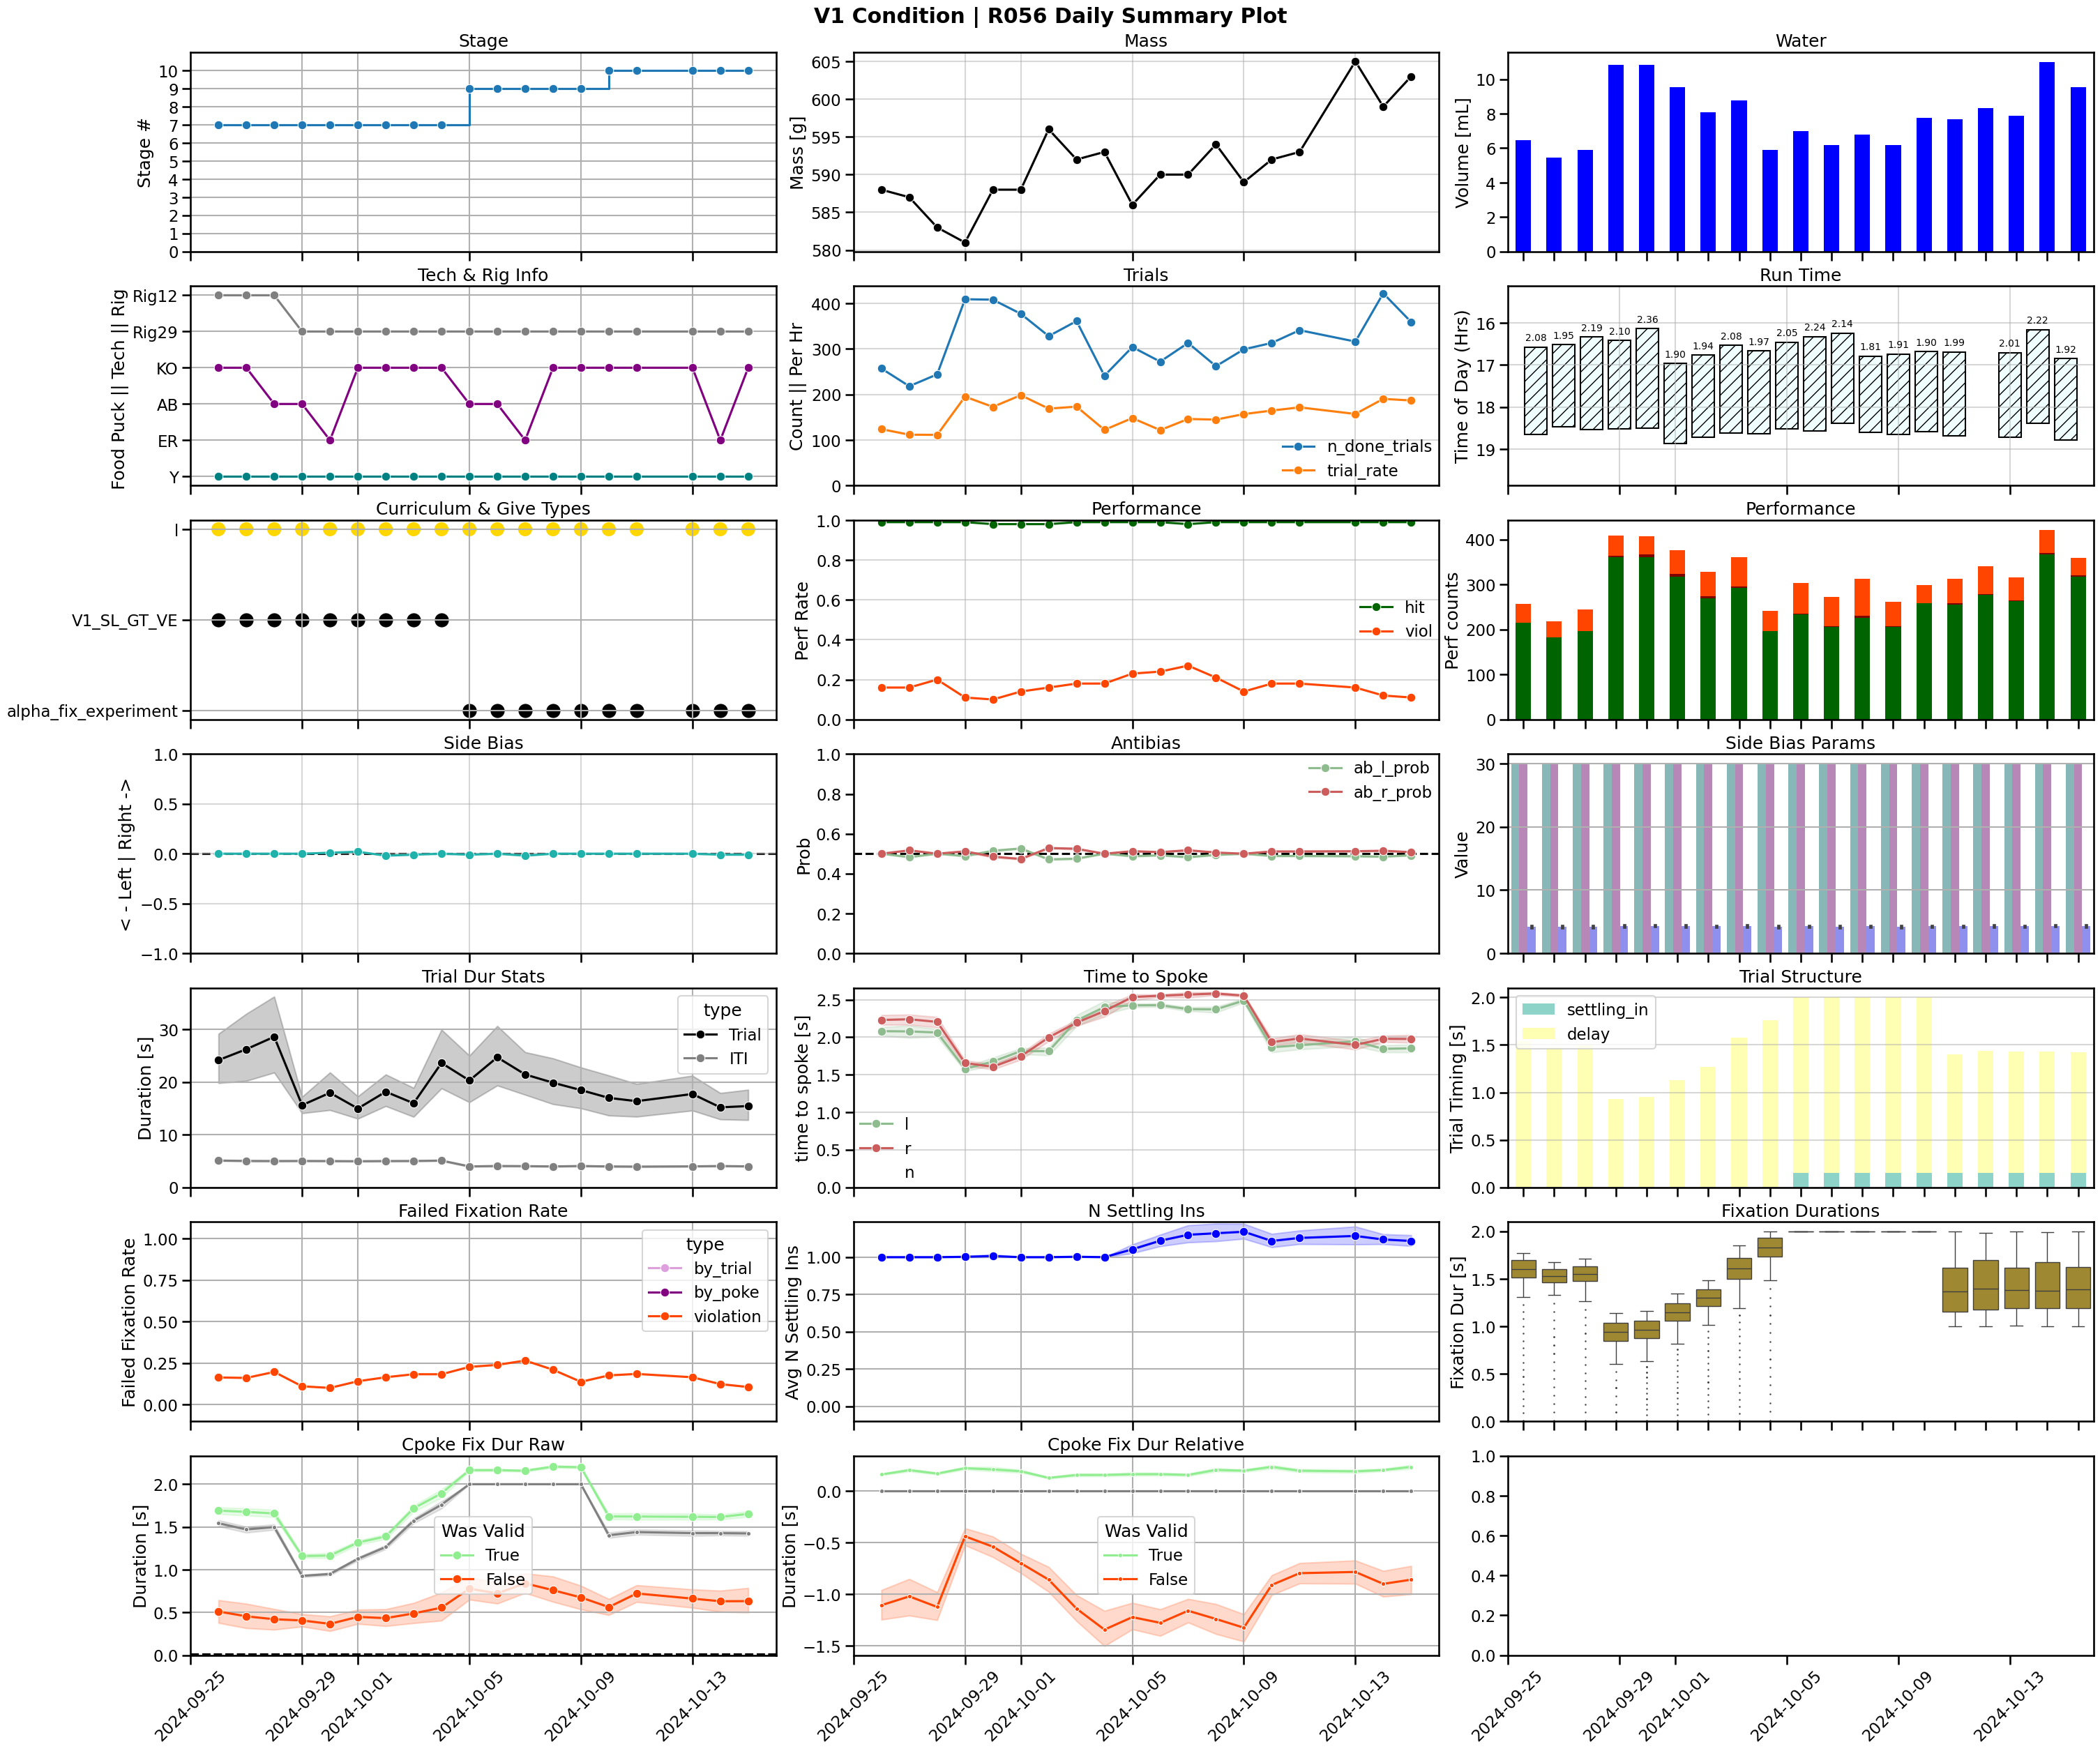

In [21]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query(
    "animal_id in @ACTIVE_ALPHA_ANIMALS"
).groupby("animal_id"):

    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [22]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ACTIVE_ALPHA_ANIMALS"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R048_2024-10-14_day_summary
making R052_2024-10-14_day_summary
making R056_2024-10-14_day_summary
making R048_2024-10-15_day_summary
making R052_2024-10-15_day_summary
making R056_2024-10-15_day_summary
